# ***ACOUSTIC EXTINGUISHER  FIRE DATASET***

***SHORT DESCRIPTION:***

**The dataset was obtained as a result of the extinguishing tests of four different 
fuel flames with a sound wave extinguishing system. A total of 17,442 tests were 
conducted with this experimental setup. The dataset includes the features of fuel 
container size representing the Flame Size, Fuel Type, Frequency, Decibel, 
Distance, Airflow and Flame Extinction Status.**

**Our aim is to predict whether the flame will be extincted or not based on the given parameters.**

***DATA PRE-PROCESSING***

In [15]:
from scipy.io.arff import loadarff
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

data = loadarff('Acoustic_Extinguisher_Fire_Dataset.arff')
df = pd.DataFrame(data[0])

print(df.head())

# Combining the numerical and categorical summary statistics
columns_to_include = ['CLASS', 'FUEL']
num_cols = df.select_dtypes(include='number')
summary_stats = pd.concat([num_cols.describe(), df[columns_to_include].describe().transpose()])
print(summary_stats)

   SIZE         FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY CLASS
0   1.0  b'gasoline'      10.0     96.0      0.0       75.0  b'0'
1   1.0  b'gasoline'      10.0     96.0      0.0       72.0  b'1'
2   1.0  b'gasoline'      10.0     96.0      2.6       70.0  b'1'
3   1.0  b'gasoline'      10.0     96.0      3.2       68.0  b'1'
4   1.0  b'gasoline'      10.0    109.0      4.5       67.0  b'1'
               SIZE      DISTANCE       DESIBEL       AIRFLOW     FREQUENCY  \
count  17442.000000  17442.000000  17442.000000  17442.000000  17442.000000   
mean       3.411765    100.000000     96.379142      6.975634     31.611111   
std        1.750977     54.773826      8.164096      4.736169     20.939149   
min        1.000000     10.000000     72.000000      0.000000      1.000000   
25%        2.000000     50.000000     90.000000      3.200000     14.000000   
50%        3.000000    100.000000     95.000000      5.800000     27.500000   
75%        5.000000    150.000000    104.000000    

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  float64
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  float64
 3   DESIBEL    17442 non-null  float64
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  float64
 6   CLASS      17442 non-null  object 
dtypes: float64(5), object(2)
memory usage: 954.0+ KB


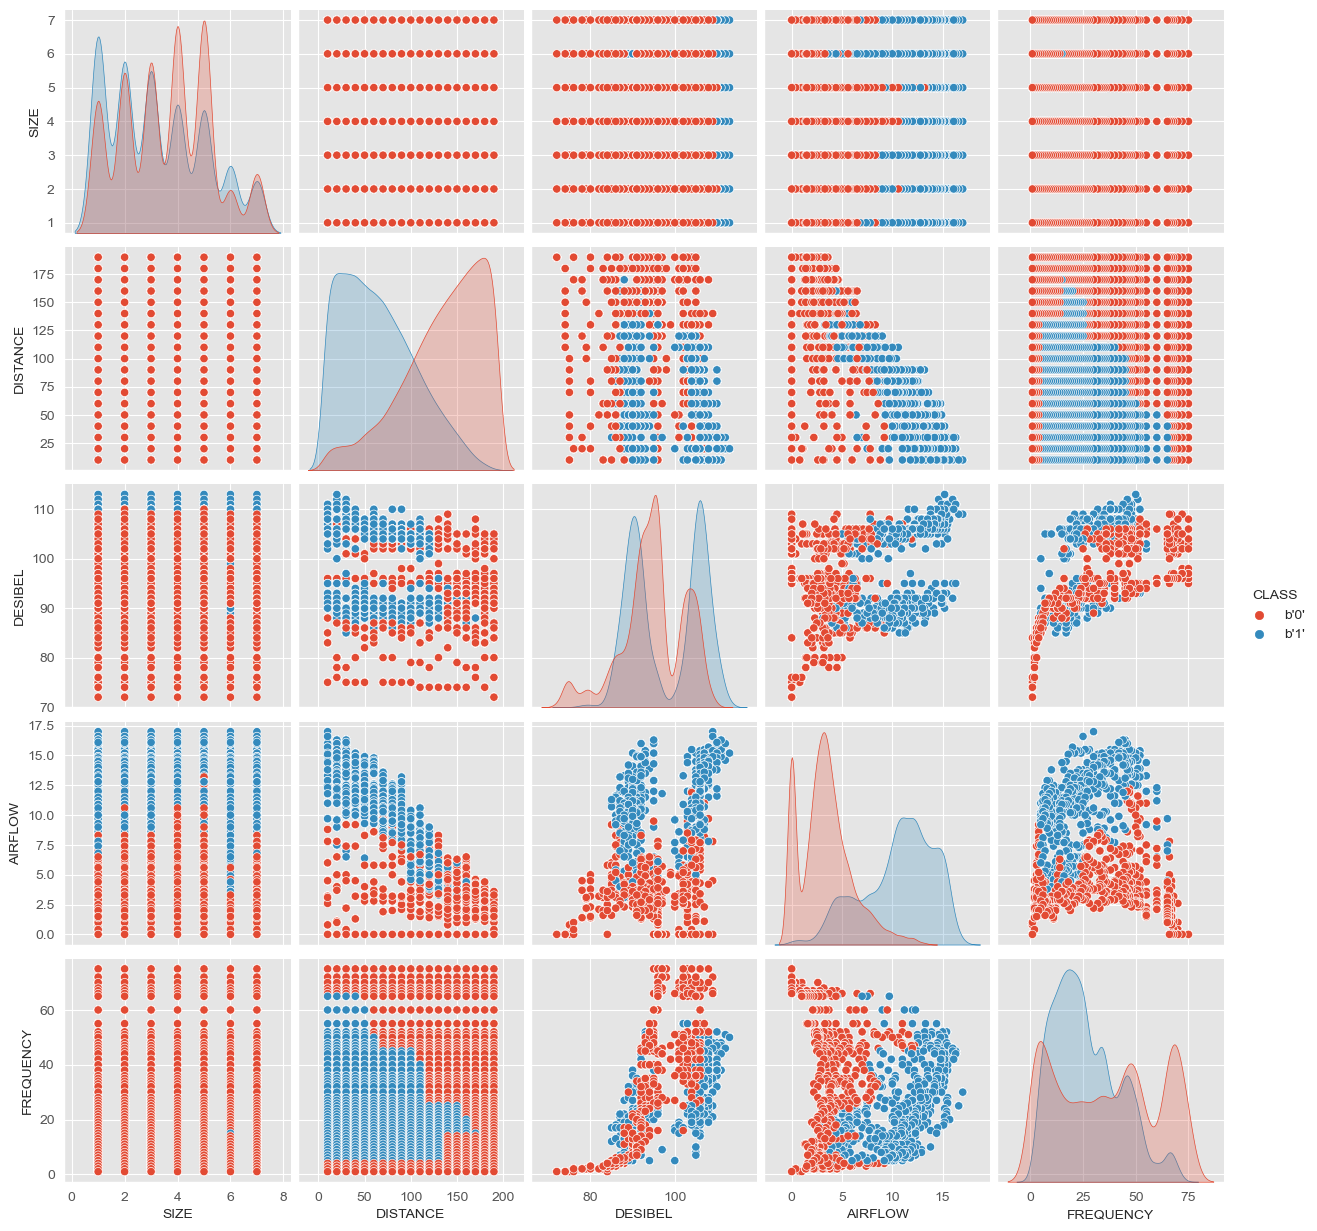

In [17]:
sb.pairplot(df.dropna(), hue='CLASS')

<Axes: xlabel='CLASS', ylabel='count'>

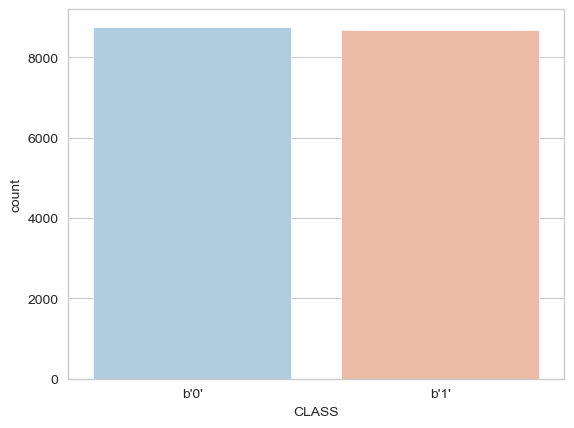

In [18]:
sb.set_style('whitegrid')
sb.countplot(x='CLASS',data=df,palette='RdBu_r')

<Axes: xlabel='FUEL', ylabel='Count'>

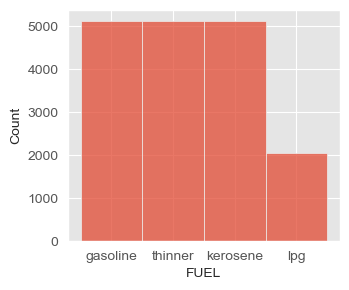

In [19]:
plt.figure(figsize=(3.5,3))
plt.style.use('ggplot')
sb.histplot(df.FUEL)

***Check for missing values*** 

In [20]:
print(df.isnull().sum())        # no missing values encountered

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
CLASS        0
dtype: int64


***Check for duplicated values*** 

In [21]:
df.duplicated().any()       # no duplicated values encountered

False

***Check for potential outliers with IQR***

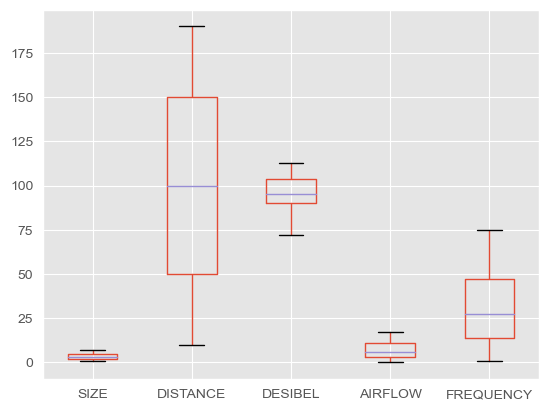

In [22]:
# check for outliers on the numerical columns
df.boxplot(column=['SIZE','DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY'])

# Display the plot
plt.show()                      # found no potential outliers beyond 1.5 times the IQR

***Check for outliers with z-score***

In [23]:
# make sure there are no outliers using z-scores
numerical_columns = ['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']
df_zscores = df[numerical_columns].apply(lambda x: (x - np.mean(x)) / np.std(x))

threshold = 3
outliers = df[df_zscores > threshold].dropna()
print(outliers)           # found no outliers

Empty DataFrame
Columns: [SIZE, FUEL, DISTANCE, DESIBEL, AIRFLOW, FREQUENCY, CLASS]
Index: []


***Convert categorical feature 'FUEL' into numerical***

In [24]:
# Perform one-hot encoding on the 'FUEL' column
df_encoded = pd.get_dummies(df, columns=['FUEL'], prefix=['FUEL'])
print(df_encoded.columns)
print(df_encoded.head())
print(df_encoded.describe())

Index(['SIZE', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY', 'CLASS',
       'FUEL_b'gasoline'', 'FUEL_b'kerosene'', 'FUEL_b'lpg'',
       'FUEL_b'thinner''],
      dtype='object')
   SIZE  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY CLASS  FUEL_b'gasoline'  \
0   1.0      10.0     96.0      0.0       75.0  b'0'                 1   
1   1.0      10.0     96.0      0.0       72.0  b'1'                 1   
2   1.0      10.0     96.0      2.6       70.0  b'1'                 1   
3   1.0      10.0     96.0      3.2       68.0  b'1'                 1   
4   1.0      10.0    109.0      4.5       67.0  b'1'                 1   

   FUEL_b'kerosene'  FUEL_b'lpg'  FUEL_b'thinner'  
0                 0            0                0  
1                 0            0                0  
2                 0            0                0  
3                 0            0                0  
4                 0            0                0  
               SIZE      DISTANCE       DESIBEL       AIRFLOW

***DEFINITION OF THE TRAINING AND TEST SETS***

In [25]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df_encoded.drop('CLASS', axis=1)
y = df_encoded['CLASS']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(set(y_train))
print(set(y_test))

{b'1', b'0'}
{b'1', b'0'}


***Converting the byte strings to integers***

In [26]:
# Convert byte strings to integers
y_train = [int(label.decode()) for label in y_train]
y_test = [int(label.decode()) for label in y_test]

***SUPERVISED LEARNING (CLASSIFICATION) ALGORITHMS***

***DECISION TREES***

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

***Performance Evaluation***

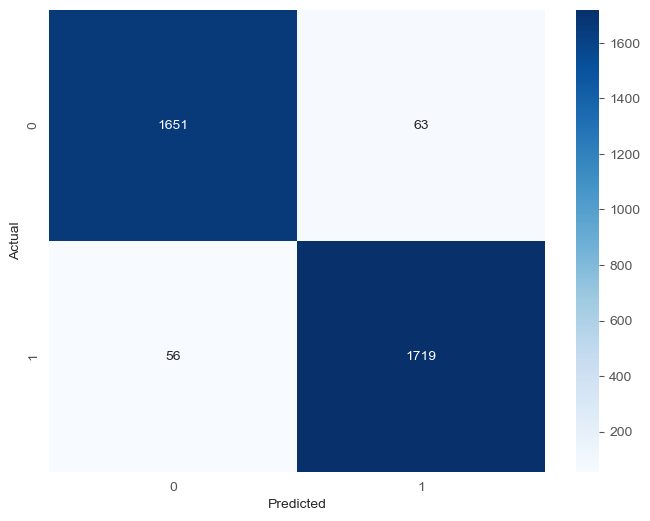

0.9658928059615935

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy_score(y_test,y_pred)

***SUPPORT VECTOR MACHINE***

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svc = SVC()
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model on the scaled training set
svc.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = svc.predict(X_test_scaled)

In [33]:
confusion_matrix(y_test,y_pred)


array([[1627,   87],
       [  94, 1681]], dtype=int64)

In [34]:
print(accuracy_score(y_test,y_pred))

0.9481226712525079


***K - NEAREST NEIGHBOURS***

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [36]:
confusion_matrix(y_test,y_pred)

array([[1605,  109],
       [ 141, 1634]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred)

0.9283462310117512